## Using language models for social networks sentiment analysis
Використання мовних моделей для аналізу настроїв у соціальних мережах


In [1]:
from text_parse import parse_file, parse_file_param
import linguistic_analysis
import function_helpers
import time
import matplotlib.pyplot as plt

In [18]:
positive_text = "Life is full of endless possibilities and opportunities waiting to be explored. Each day presents us with a chance to learn, grow, and make a positive impact on the world around us. Embracing optimism and gratitude can lead to incredible experiences and meaningful connections with others. Remember to cherish the little moments of joy, celebrate your accomplishments, and keep moving forward with confidence and determination. With a positive mindset and a heart filled with hope, anything is possible!"
neutral_texts = [
    "Statistics play a crucial role in various fields, providing valuable insights and aiding decision-making processes. From business and economics to science and healthcare, statistical analysis helps researchers and professionals make sense of complex data sets and draw meaningful conclusions. Whether analyzing trends, conducting experiments, or evaluating outcomes, statistical methods offer a systematic approach to understanding uncertainty and variability within data. By applying statistical techniques accurately",
    "Technology continues to revolutionize the way we live, work, and interact with the world around us. From smartphones and social media to artificial intelligence and virtual reality, advancements in technology have transformed nearly every aspect of our daily lives. With the rapid pace of innovation, society faces both opportunities and challenges in adapting to new technologies and harnessing their potential for the greater good. As we navigate the ever-evolving landscape of technology"
]
aggressive_text = " Don't expect this kind of tone from me ever again, but listen up. If you think you can just brush me off and ignore what I'm capable of, you're sorely mistaken. You push me, and there will be consequences. Remember that the next time you decide to play games. You got it. You think you're in charge? You're nothing but a delay in my plans. Fix it now, or you'll answer to me. Absolutely, buckle up.  This conversation is going nowhere fast. Unless you spill the details, I'm coming for them myself, and it won't be pretty."
texts = [positive_text, neutral_texts[0], neutral_texts[1], aggressive_text]


start_time = time.time()

rows = parse_file_param("tweets_sentiment.csv", 2, 20000, 3, "negative")

result = linguistic_analysis.analyse_tfidf_cosine(rows, texts, True)

result_normalized = [function_helpers.normalize_e(value) for value in result] 

end_time = time.time()
execution_time = end_time - start_time

print(result)
print(f"Execution time: {execution_time} seconds")

[0.05284092 0.02413836 0.0337024  0.0649655 ]
Execution time: 0.24248981475830078 seconds


Text(0, 0.5, 'coefficient')

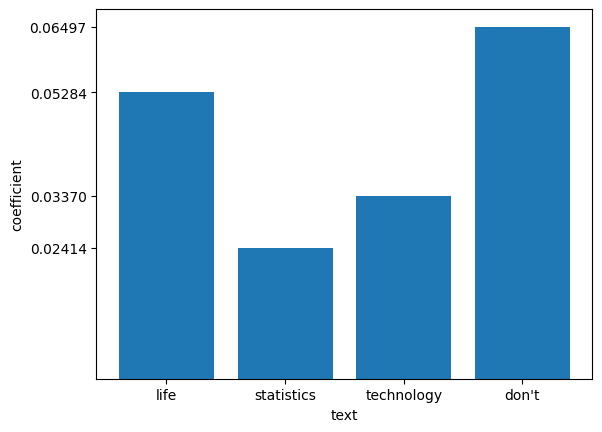

In [19]:
tags = [text.lower().split()[0] for text in texts]
plt.bar(tags, result)
plt.xticks(tags)
plt.yticks(result) 
plt.xlabel('text')
plt.ylabel('coefficient')

## Usage of n-gram model:
Використання n-gram моделі

[0.         0.         0.         0.00854451]


Text(0, 0.5, 'coefficient')

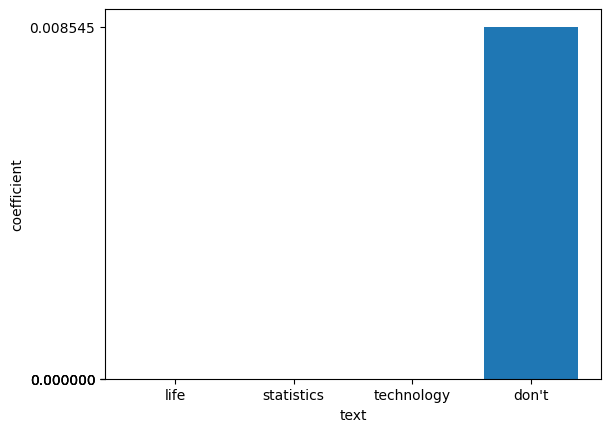

In [20]:
result_n = linguistic_analysis.analyse_n_grams(rows, texts, 3, True)

print(result_n)

tags = [text.lower().split()[0] for text in texts]
plt.bar(tags, result_n)
plt.xticks(tags)
plt.yticks(result_n) 
plt.xlabel('text')
plt.ylabel('coefficient')

## Compare positive and negative scores
Порівняння позитивних та негативних текстів


In [21]:
start_time = time.time()

rows_negative = parse_file_param("tweets_sentiment.csv", 2, 30000, 3, "negative")
rows_positive = parse_file_param("tweets_sentiment.csv", 2, 30000, 3, "positive")

result_negative = linguistic_analysis.analyse_tfidf_cosine(rows_negative, texts, True)
result_negative_normalized = [function_helpers.normalize_e(value) for value in result] 

result_positive = linguistic_analysis.analyse_tfidf_cosine(rows_positive, texts, True)
result_positive_normalized = [function_helpers.normalize_e(value) for value in result] 


result_n_negative = linguistic_analysis.analyse_n_grams(rows_negative, texts, 2, True)
result_n_positive = linguistic_analysis.analyse_n_grams(rows_positive, texts, 2, True)

end_time = time.time()
execution_time = end_time - start_time

print("negative tfidf: ", result_negative)
print("positive tfidf: ", result_positive)
print("negative 2-gram: ", result_n_negative)
print("positive 2-gram: ", result_n_positive)
print(f"Execution time: {execution_time} seconds")

negative tfidf:  [0.05284092 0.02413836 0.0337024  0.0649655 ]
positive tfidf:  [0.06090492 0.03645314 0.04307565 0.06129772]
negative 2-gram:  [0.01632292 0.         0.01632292 0.0248014 ]
positive 2-gram:  [0.01632475 0.00747874 0.0145196  0.02364985]
Execution time: 0.5481493473052979 seconds


In [22]:
start_time = time.time()

rows_negative = parse_file_param("dataset_sentiment.csv", 0, 8000, 2, "negative")
rows_positive = parse_file_param("dataset_sentiment.csv", 0, 8000, 2, "positive")

result_negative = linguistic_analysis.analyse_tfidf_cosine(rows_negative, texts, True)
result_negative_normalized = [function_helpers.normalize_e(value) for value in result] 

result_positive = linguistic_analysis.analyse_tfidf_cosine(rows_positive, texts, True)
result_positive_normalized = [function_helpers.normalize_e(value) for value in result] 


result_n_negative = linguistic_analysis.analyse_n_grams(rows_negative, texts, 2, True)
result_n_positive = linguistic_analysis.analyse_n_grams(rows_positive, texts, 2, True)

end_time = time.time()
execution_time = end_time - start_time

print("negative tfidf: ", result_negative)
print("positive tfidf: ", result_positive)
print("negative 2-gram: ", result_n_negative)
print("positive 2-gram: ", result_n_positive)
print(f"Execution time: {execution_time} seconds")

negative tfidf:  [0.02737517 0.0259744  0.0252589  0.02952464]
positive tfidf:  [0.02837828 0.02916656 0.02549483 0.02852384]
negative 2-gram:  [0.01017331 0.00686981 0.00909184 0.01478148]
positive 2-gram:  [0.01245857 0.00790117 0.01239014 0.01518239]
Execution time: 7.052157402038574 seconds
